### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=4)
from sklearn.linear_model import LinearRegression, SGDRegressor

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv('../data/Boston.csv',index_col='Unnamed: 0')

In [3]:
boston_x=df.iloc[:,:-1].values
boston_y=df.iloc[:,[-1]].values
boston_y1=df.iloc[:,-1].values

Boston.csv

LinearRegress, SGDRegress 를 이용하여(각각)
1) 기울기, 절편 출력
2) 0번째와 6번째 행의 데이터로 주택 중위 가격을 예측
3) 실제 medv와 예측 medv 라인차트를 그리시요
4) 각각의 결정계수값을 구하시요.

1) 기울기, 절편 출력

In [4]:
linear=LinearRegression()
linear.fit(boston_x,boston_y)

linear_w=linear.coef_
linear_b=linear.intercept_

In [5]:
sgd=SGDRegressor(verbose=1,n_iter_no_change=500,eta0=0.00001)
sgd.fit(boston_x,boston_y1)

sgd_w=sgd.coef_
sgd_b=sgd.intercept_

-- Epoch 1
Norm: 0.11, NNZs: 13, Bias: 0.000766, T: 506, Avg. loss: 126.993372
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 13, Bias: 0.001482, T: 1012, Avg. loss: 61.758370
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.15, NNZs: 13, Bias: 0.002055, T: 1518, Avg. loss: 52.438078
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.17, NNZs: 13, Bias: 0.002518, T: 2024, Avg. loss: 50.269317
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 13, Bias: 0.002936, T: 2530, Avg. loss: 47.750223
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.20, NNZs: 13, Bias: 0.003268, T: 3036, Avg. loss: 44.932057
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.21, NNZs: 13, Bias: 0.003632, T: 3542, Avg. loss: 44.121356
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.22, NNZs: 13, Bias: 0.003957, T: 4048, Avg. loss: 44.996322
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.23, NNZs: 13, Bias: 0.004379, T: 4554, Avg. loss: 41.342428
Total tra

c:\Users\Dell5371\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
print('LinearRegression 기울기: ',linear_w)
print('LinearRegression 절편: ',linear_b)
print('SGDRegressor 기울기: ',sgd_w)
print('SGDRegressor 절편: ',sgd_b)

LinearRegression 기울기:  [[ -0.108    0.0464   0.0206   2.6867 -17.7666   3.8099   0.0007  -1.4756
    0.306   -0.0123  -0.9527   0.0093  -0.5248]]
LinearRegression 절편:  [36.4595]
SGDRegressor 기울기:  [-0.0792  0.1019 -0.0221  0.0775  0.0446  1.0951  0.1039 -0.0197  0.1022
 -0.0052  0.4926  0.0286 -0.8053]
SGDRegressor 절편:  [0.1024]


2) 0번째와 6번째 행의 데이터로 주택 중위 가격을 예측

In [7]:
print(linear.predict(boston_x[[0,6]]))

print(sgd.predict(boston_x[[0,6]]))


[[30.0038]
 [23.0018]]
[29.2366 22.2912]


3) 실제 medv와 예측 medv 라인차트를 그리시요

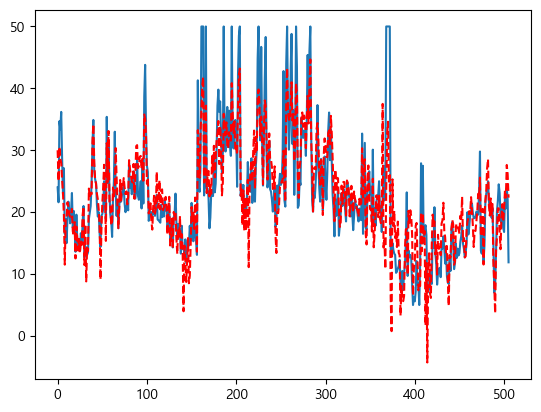

In [8]:
plt.plot(boston_y)
plt.plot(linear.predict(boston_x),'r--')
plt.show()

4) 각각의 결정계수값을 구하시요.

In [9]:
print(linear.score(boston_x,boston_y))
print(sgd.score(boston_x,boston_y1))

0.7406426641094095
0.5142926963765231


In [10]:
def sc(model,x,y):
    print(model.score(x,y))
    #r=1-sse(잔차제곱합)/sst(총 제곱합)
    sse=sum((y-model.predict(x))**2)
    sst=sum((y-y.mean())**2)
    r=1-sse/sst
    return r



In [11]:
print(sc(linear,boston_x,boston_y)[0])
print(sc(sgd,boston_x,boston_y1))

0.7406426641094095
0.7406426641094094
0.5142926963765231
0.5142926963765232
